# Diabetes Prediction on Pima Indians Diabetes Database using Naive Bayes

### Data Desription 

#### Predictor Variables

1. Preganancies - Number of times the patient got pregnant 
2. Glucose - Plasma glucose concentration 
3. Blood Preassure - Diastolic Blood Preassure (mmHg)
4. Skin Thickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [32]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,8)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Data Reading 

In [3]:
# read the dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# shape of the dataset

print("The shape of the datset: ",df.shape)

The shape of the datset:  (768, 9)


In [6]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Outcome is our target variable.

### Understanding the Data

In [7]:
# finding the missing/null values in the dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# description of the datset  

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- We can see that there are minimum as 0 in 2nd - 6th columns.
- So have to replace the 0 with the median values, because median values are less affected by the outliers.

In [10]:
# replacing the zeros with median values

df['Glucose']=df['Glucose'].replace(0,df.Glucose.median())
df['BloodPressure']=df['BloodPressure'].replace(0,df.BloodPressure.median())
df['SkinThickness']=df['SkinThickness'].replace(0,df.SkinThickness.median())
df['Insulin']=df['Insulin'].replace(0,df.Insulin.median())
df['BMI']=df['BMI'].replace(0,df.BMI.median())

In [11]:
# description of the dataset after replacing the median values

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Outlier Treatment

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

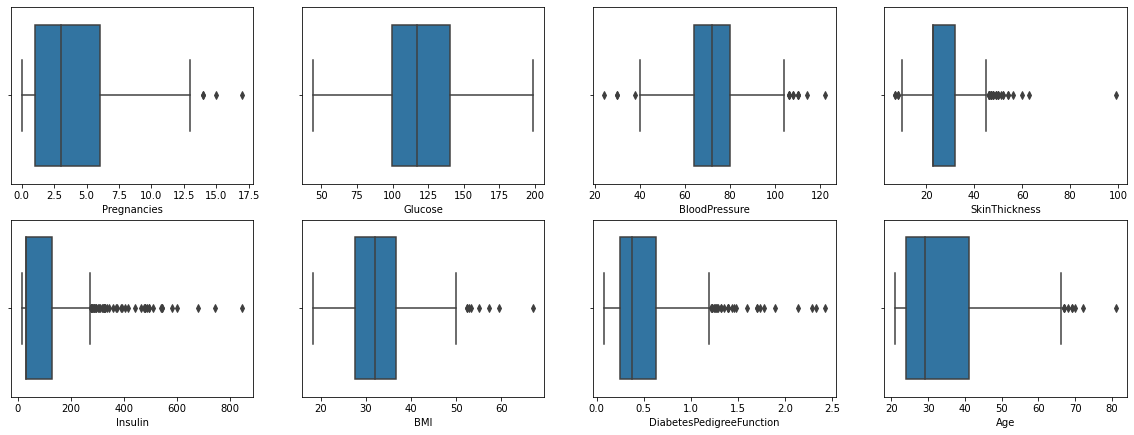

In [15]:
# finding the outliers in the data

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(df['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(df['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(df['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(df['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(df['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(df['BMI'])

plt.subplot(4,4,7)
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(df['Age'])
plt.show()

In [17]:
# clipping the dataset from based 

df['Pregnancies'] = df['Pregnancies'].clip(lower=df['Pregnancies'].quantile(0.05), upper=df['Pregnancies'].quantile(0.95))
df['BloodPressure'] = df['BloodPressure'].clip(lower=df['BloodPressure'].quantile(0.05), upper=df['BloodPressure'].quantile(0.95))
df['SkinThickness'] = df['SkinThickness'].clip(lower=df['SkinThickness'].quantile(0.10), upper=df['SkinThickness'].quantile(0.90))
df['Insulin'] = df['Insulin'].clip(lower=df['Insulin'].quantile(0.25), upper=df['Insulin'].quantile(0.80))
df['BMI'] = df['BMI'].clip(lower=df['BMI'].quantile(0.05), upper=df['BMI'].quantile(0.95))
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].clip(lower=df['DiabetesPedigreeFunction'].quantile(0.05), upper=df['DiabetesPedigreeFunction'].quantile(0.95))
df['Age'] = df['Age'].clip(lower=df['Age'].quantile(0.05), upper=df['Age'].quantile(0.95))

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

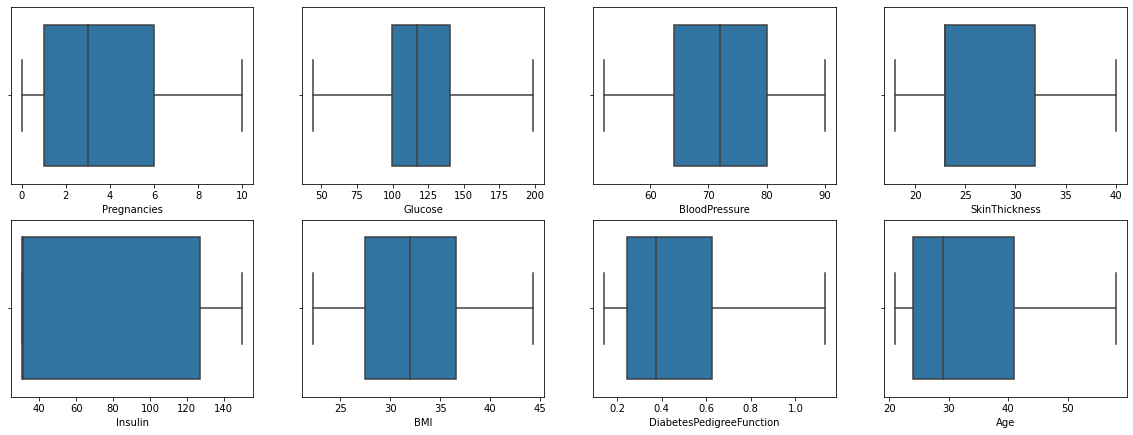

In [18]:
# After treating the outliers

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(df['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(df['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(df['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(df['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(df['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(df['BMI'])

plt.subplot(4,4,7)
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(df['Age'])
plt.show()

- After treating the outlier, the data looks clean from outliers.

### Visualisation 

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


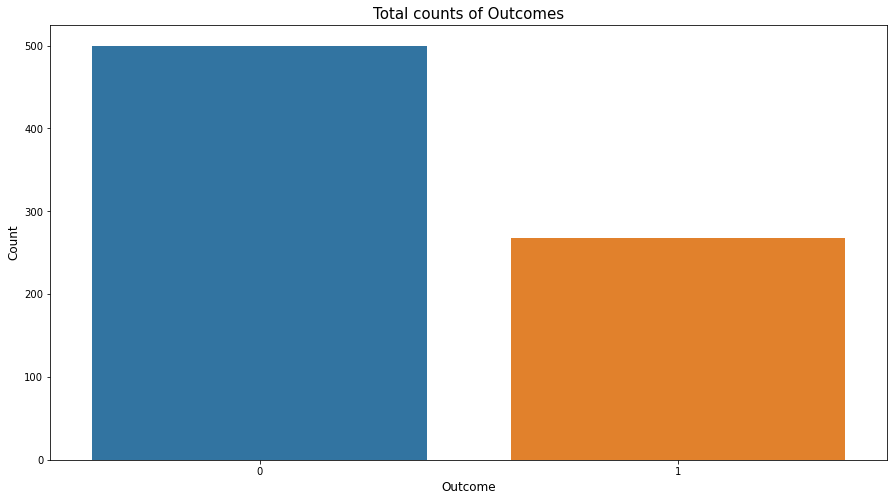

In [24]:
# plotting the count of the outcomes

sns.countplot(df.Outcome)

plt.xlabel('Outcome',size=12)
plt.ylabel('Count',size=12)
plt.title('Total counts of Outcomes',size=15)
plt.show()

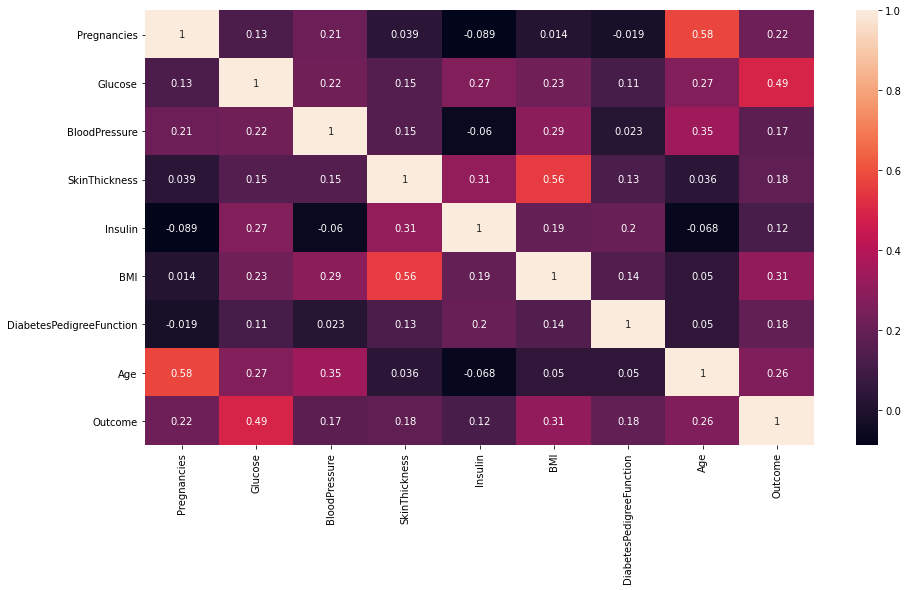

In [25]:
# plotting heatmap to find the correlation

sns.heatmap(df.corr(), annot=True)
plt.show()

- Since, BMI and SkinThickness are highly correlated we can drop the any one column.

In [27]:
# we can drop the highly correlated columns

df = df.drop(['Age','BMI'], axis=1)

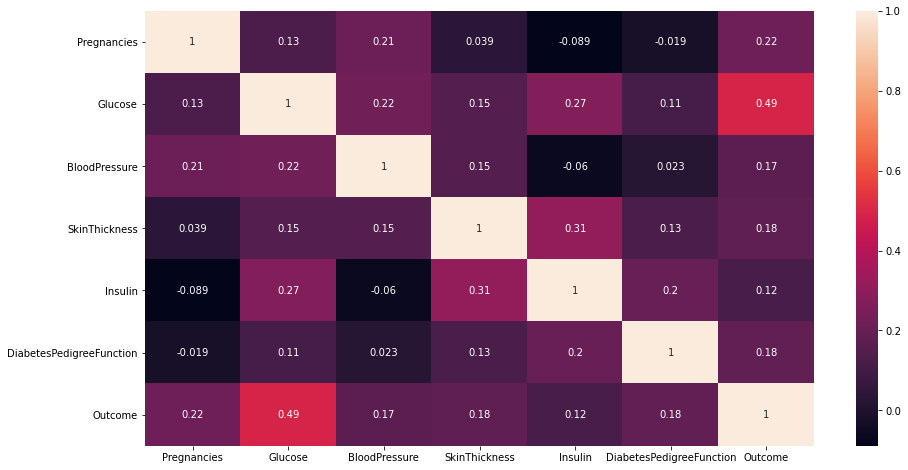

In [28]:
# after dropping the highly correlated columns 

sns.heatmap(df.corr(), annot=True)
plt.show()

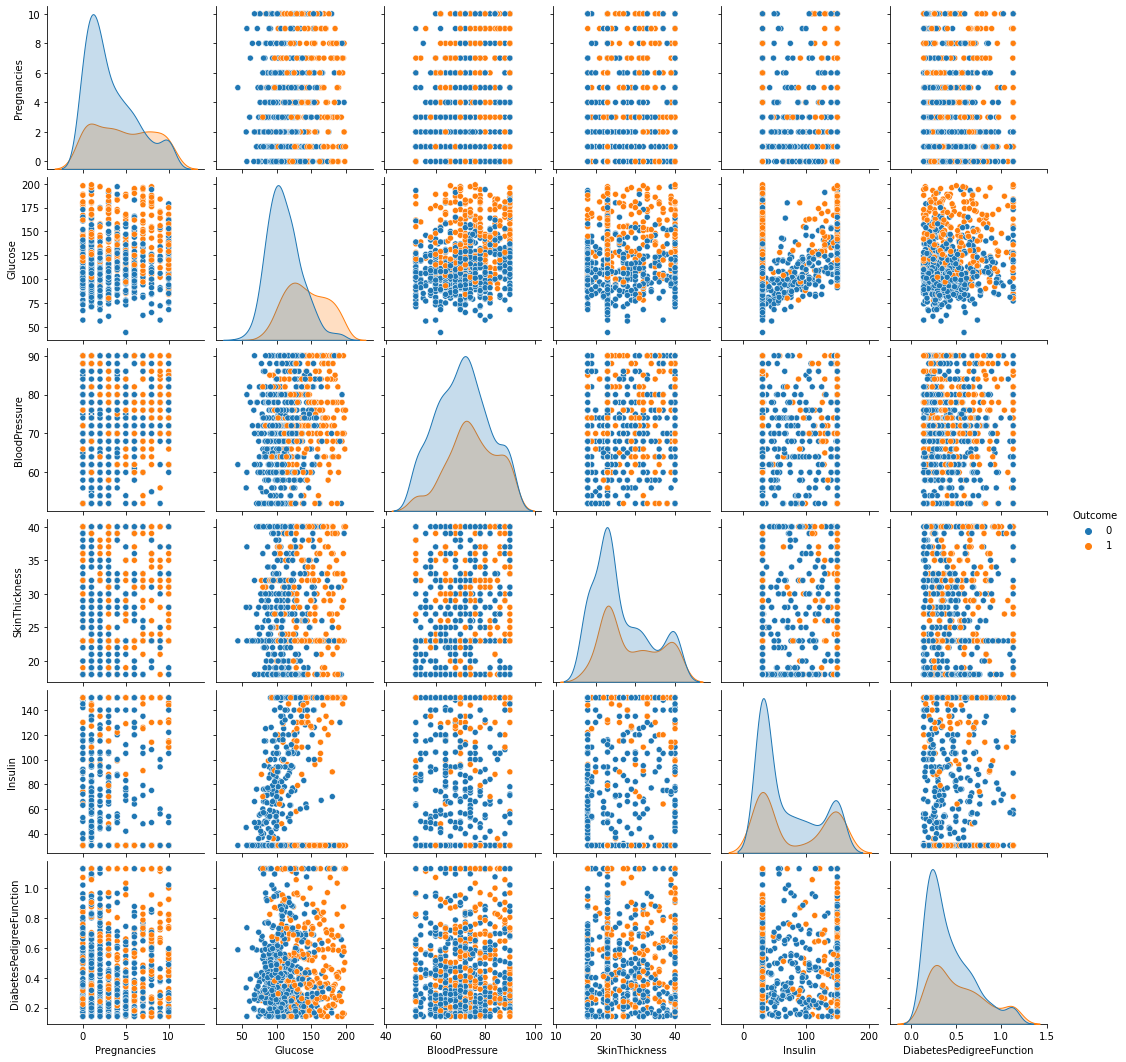

In [30]:
# pair plot analysis 

sns.pairplot(df, hue = 'Outcome', diag_kind='kde')
plt.show()

- Seeing the distribution of these features are overlapping one another, we can conclude that model built ont his data will not be able to find hidden pattern. 

### Modelling

- Split the data into dependent and independent variable.
- Then split the data into train and test.

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

In [34]:
# splitting the data into dependent and independent variables.

X = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [35]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# assigning the algorithm 

nv_bayes = GaussianNB()

In [37]:
# fitting the train data into the model

nv_bayes.fit(X_train,y_train)

GaussianNB()

In [38]:
# making prediction

y_test_pred = nv_bayes.predict(X_test)

In [41]:
# printing the accuracy

print("The accuracy of the model :", round(accuracy_score(y_test, y_test_pred)*100,4),'%')

The accuracy of the model : 74.026 %
